# Install and Import Required Libraries

In [ ]:
!pip install lime
!pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 18.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=d7d69939929f002b5b988a686b71b7772ef3735f70489a005176d07fd9ced4ae
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
!pip install shap


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 33.0 MB/s eta 0:00:00


In [ ]:
!pip install scikeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.8/47.8 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 46.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 51.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.7/347.7 kB 26.3 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.4.1 which is incompatible.


In [ ]:
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 63.6 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scikeras 0.13.0 requires keras>=3.2.0, but you have keras 2.15.0 which is incompatible.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.utils.class_weight import compute_class_weight
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.models import Sequential , Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Dropout, Concatenate, BatchNormalization, GRU
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.metrics import AUC
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping ,ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import BatchNormalization

import shap
from wordcloud import WordCloud
import lime
from lime.lime_text import LimeTextExplainer
import time
from datetime import timedelta


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/sentiment_and_topics.csv')

In [ ]:
df.head()

,Text,ed_label_0,ed_label_1,oh_label,preprocessed_text,entities,tagged_text,pos_tags,cleaned_text,custom_tokens,sentiment_polarity,sentiment_subjectivity,dominant_topic
0,This One can make an analogy in mathematical t...,0.9,0.1,0,This One can make an analogy in mathematical t...,"[('Gaussian', 'NORP'), ('three', 'CARDINAL'), ...",This_DET One_PRON can_AUX make_VERB an_DET ana...,"[('This', 'DET'), ('One', 'PRON'), ('can', 'AU...",This One can make an analogy in mathematical t...,"['This', 'One', 'can', 'make', 'an', 'analogy'...",0.098611,0.231944,9
1,Clarification for you and Zundarks right i sho...,1.0,0.0,0,Clarification for you and [PERSON] right i sho...,"[('Zundarks', 'PERSON'), ('Wikipedia', 'ORG'),...",Clarification_NOUN for_ADP you_PRON and_CCONJ ...,"[('Clarification', 'NOUN'), ('for', 'ADP'), ('...",Clarification for you and Zundarks right i sho...,"['Clarification', 'for', 'you', 'and', 'Zundar...",0.185714,0.458631,6
2,Elected or Electoral <allcaps> JHK </allcaps>,1.0,0.0,0,Elected or Electoral <allcaps> <allcaps> [ORG]...,"[('JHK', 'ORG')]",Elected_VERB or_CCONJ Electoral_PROPN <_PROPN ...,"[('Elected', 'VERB'), ('or', 'CCONJ'), ('Elect...",Elected or Electoral allcaps JHK allcaps,"['Elected', 'or', 'Electoral', 'allcaps', 'JHK...",0.000000,0.000000,7
3,This is such a fun entry Devotchka I once had ...,1.0,0.0,0,This is such a fun entry Devotchka I once had ...,"[('Korea', 'GPE'), ('USAEnglish', 'NORP'), ('B...",This_PRON is_AUX such_DET a_DET fun_NOUN entry...,"[('This', 'PRON'), ('is', 'AUX'), ('such', 'DE...",This is such a fun entry Devotchka I once had ...,"['This', 'is', 'such', 'a', 'fun', 'entry', 'D...",0.090344,0.303553,9
4,Please relate the ozone hole to increases in c...,0.8,0.2,0,Please relate the ozone hole to increases in c...,"[('Ed Poor', 'PERSON')]",Please_INTJ relate_VERB the_DET ozone_NOUN hol...,"[('Please', 'INTJ'), ('relate', 'VERB'), ('the...",Please relate the ozone hole to increases in c...,"['Please', 'relate', 'the', 'ozone', 'hole', '...",0.000000,0.000000,9


In [ ]:
print(df['cleaned_text'].dtype)
print(df['cleaned_text'].isnull().sum())

object
50


In [ ]:
df['cleaned_text'] = df['cleaned_text'].astype(str).replace('nan', '')

In [ ]:
# Prepare the text data
text_data = df['cleaned_text'].values  # or 'custom_tokens' if it's already tokenized
max_words = 10000
max_len = 200

In [ ]:
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(text_data)
X_text = tokenizer.texts_to_sequences(text_data)
X_text_pad = pad_sequences(X_text, maxlen=max_len)

In [ ]:
# Prepare additional features
additional_features = df[['sentiment_polarity', 'sentiment_subjectivity', 'dominant_topic']].values

# Normalize additional features
scaler = StandardScaler()
additional_features_scaled = scaler.fit_transform(additional_features)

<ipython-input-14-7fa9c4966afa>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


<Figure size 1500x800 with 0 Axes>

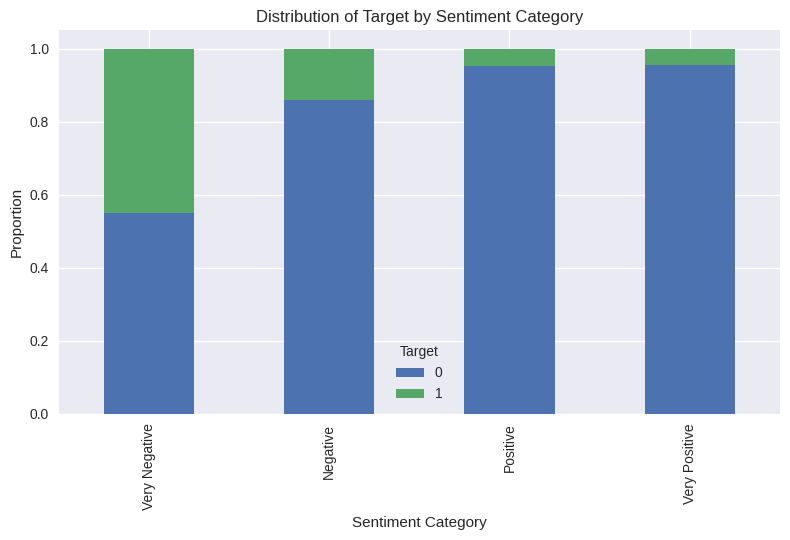

<Figure size 1200x600 with 0 Axes>

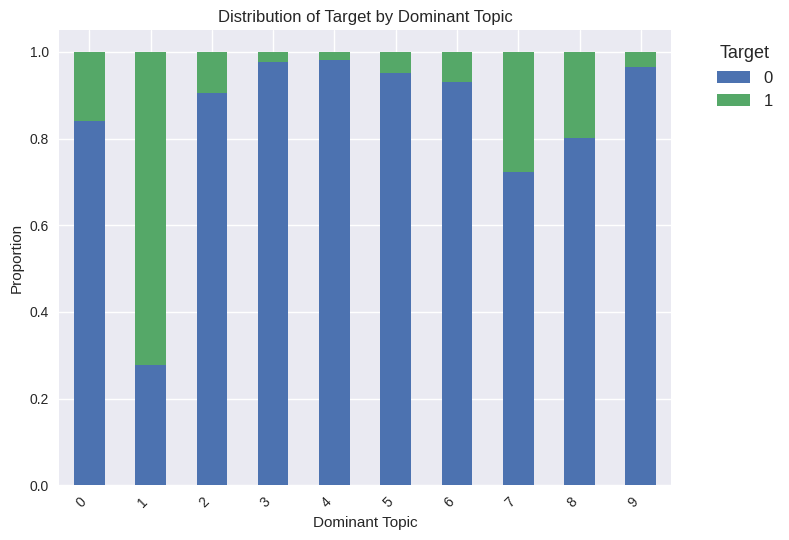

<Figure size 800x550 with 0 Axes>

In [ ]:
# Set up the plot style
plt.style.use('seaborn')

# 1. Stacked bar chart for target and sentiment
plt.figure(figsize=(15, 8))
df['sentiment_category'] = pd.cut(df['sentiment_polarity'],
                                  bins=[-1, -0.5, 0, 0.5, 1],
                                  labels=['Very Negative', 'Negative', 'Positive', 'Very Positive'])
sentiment_target = pd.crosstab(df['sentiment_category'], df['oh_label'], normalize='index')
sentiment_target.plot(kind='bar', stacked=True)
plt.title('Distribution of Target by Sentiment Category')
plt.xlabel('Sentiment Category')
plt.ylabel('Proportion')
plt.legend(title='Target')
plt.tight_layout()
plt.show()

# 2. Stacked bar chart for dominant topic and target
plt.figure(figsize=(12, 6))
topic_target = pd.crosstab(df['dominant_topic'], df['oh_label'], normalize='index')
topic_target.plot(kind='bar', stacked=True)
plt.title('Distribution of Target by Dominant Topic')
plt.xlabel('Dominant Topic')
plt.ylabel('Proportion')
plt.legend(title='Target', title_fontsize='13', fontsize='12', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


plt.tight_layout()
plt.show()

## Split data and define Target Variable

In [ ]:
# define target variable
y = df['oh_label'].values

# Split the data
X_text_train, X_text_test, X_feat_train, X_feat_test, y_train, y_test = train_test_split(
    X_text_pad, additional_features_scaled, y, test_size=0.2, random_state=42, stratify=y
)


# The first Model based on Only TEXT data

In [ ]:
# Build the first model
embedding_dim = 100

model_1 = Sequential([
    Embedding(max_words, embedding_dim, input_length=max_len),
    LSTM(64, return_sequences=True),
    LSTM(32),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model_1.compile(optimizer=Adam(learning_rate=0.001),
                loss='binary_crossentropy',
                metrics=['accuracy', AUC(name='auc')])

# Compute class weights
class_weights = None
if len(np.unique(y_train)) == 2:  # Binary classification
    class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
    class_weight_dict = dict(enumerate(class_weights))
else:
    print("Not using class weights (multiclass problem or already balanced)")

# Callbacks
early_stopping = EarlyStopping(monitor='val_auc', patience=5, mode='max', verbose=1)
model_checkpoint = ModelCheckpoint('best_model_1.h5', monitor='val_auc', mode='max', save_best_only=True, verbose=1)

# Record start time
start_time = time.time()

# Train the model
history = model_1.fit(
    X_text_train,
    y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping, model_checkpoint],
    class_weight=class_weight_dict if class_weights is not None else None,
    verbose=1
)

# Record end time
end_time = time.time()

# Calculate runtime
runtime = end_time - start_time

# Load the best model
model_1.load_weights('best_model_1.h5')

# Print runtime
print(f"Total runtime: {timedelta(seconds=runtime)}")

#save the model
model_1.save('model_1.h5')

Epoch 1/50
3194/3194 [==============================] - ETA: 0s - loss: 0.3007 - accuracy: 0.8867 - auc: 0.9432
Epoch 1: val_auc improved from -inf to 0.96972, saving model to best_model_1.h5
3194/3194 [==============================] - 160s 47ms/step - loss: 0.3007 - accuracy: 0.8867 - auc: 0.9432 - val_loss: 0.2028 - val_accuracy: 0.9269 - val_auc: 0.9697
Epoch 2/50
   5/3194 [..............................] - ETA: 1:24 - loss: 0.2236 - accuracy: 0.9500 - auc: 0.9830

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3193/3194 [============================>.] - ETA: 0s - loss: 0.2055 - accuracy: 0.9200 - auc: 0.9736
Epoch 2: val_auc did not improve from 0.96972
3194/3194 [==============================] - 74s 23ms/step - loss: 0.2055 - accuracy: 0.9200 - auc: 0.9736 - val_loss: 0.2151 - val_accuracy: 0.9191 - val_auc: 0.9686
Epoch 3/50
3194/3194 [==============================] - ETA: 0s - loss: 0.1611 - accuracy: 0.9333 - auc: 0.9833
Epoch 3: val_auc did not improve from 0.96972
3194/3194 [==============================] - 76s 24ms/step - loss: 0.1611 - accuracy: 0.9333 - auc: 0.9833 - val_loss: 0.2285 - val_accuracy: 0.9036 - val_auc: 0.9674
Epoch 4/50
3194/3194 [==============================] - ETA: 0s - loss: 0.1283 - accuracy: 0.9437 - auc: 0.9887
Epoch 4: val_auc did not improve from 0.96972
3194/3194 [==============================] - 76s 24ms/step - loss: 0.1283 - accuracy: 0.9437 - auc: 0.9887 - val_loss: 0.1896 - val_accuracy: 0.9292 - val_auc: 0.9629
Epoch 5/50
3192/3194 [==============

## Evaluate the First Model

In [ ]:
# Load the best model
model_1.load_weights('best_model_1.h5')

# Evaluate the model
y_pred = model_1.predict(X_text_test)
auc_score = roc_auc_score(y_test, y_pred)
print(f"Test AUC: {auc_score}")

999/999 [==============================] - 8s 7ms/step
Test AUC: 0.9680048689869425


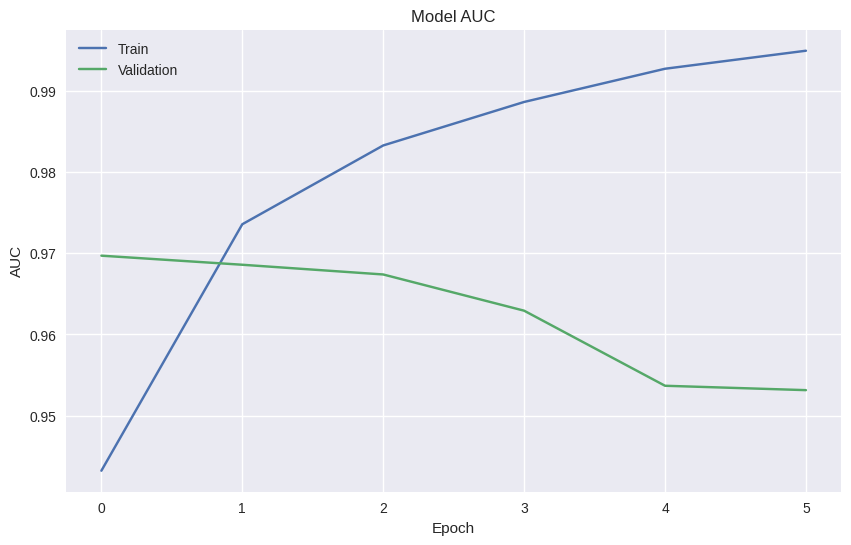

In [ ]:
# Plot AUC over epochs

plt.figure(figsize=(10, 6))
plt.plot(history.history['auc'])
plt.plot(history.history['val_auc'])
plt.title('Model AUC')
plt.ylabel('AUC')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Model interpretability

Number of toxic instances in the sample: 925
157/157 [==============================] - 1s 7ms/step
Top features contributing to toxic predictions:
    Feature     Weight
0       you  41.802442
1      fuck  18.903621
2      your  18.580716
3    stupid  15.015617
4      shit  14.486592
5         a  14.407527
6   fucking  13.843040
7      Fuck  11.986823
8     idiot   9.534534
9       ass   8.789603
10      You   8.531502
11  allcaps   8.277205
12      are   7.607834
13      gay   7.300109
14    bitch   6.195694
15   ashore   5.999625
16     crap   5.741420
17     hell   5.564687
18    sucks   5.434189
19      YOU   4.962399


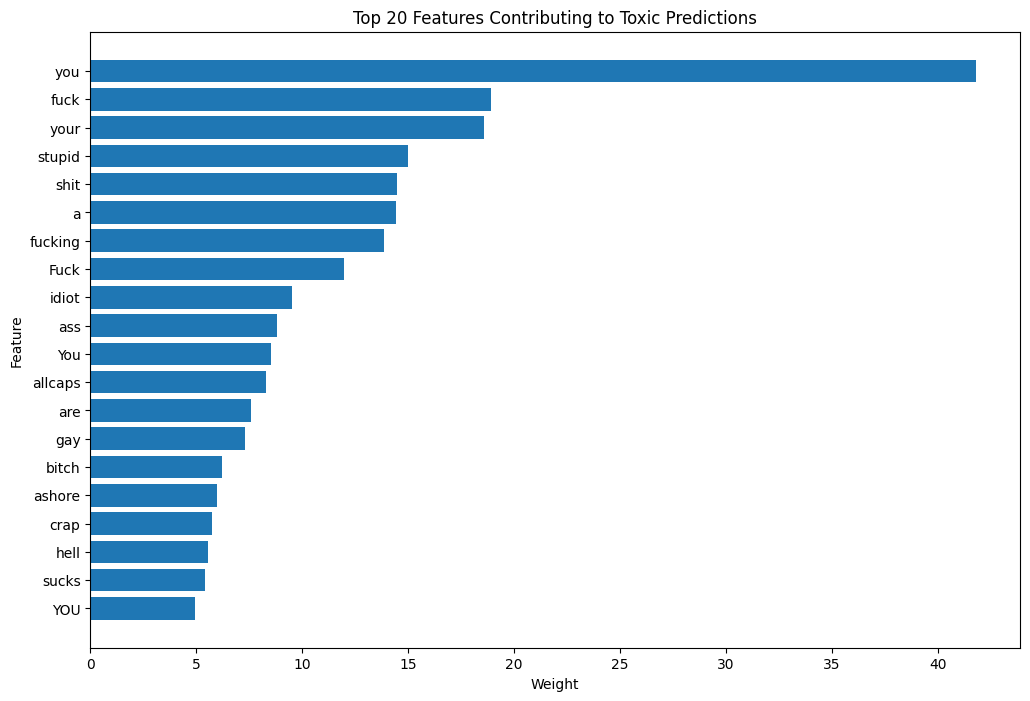

In [ ]:
import pandas as pd
import numpy as np
from collections import Counter
from lime.lime_text import LimeTextExplainer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Load the saved model
model_1 = load_model('/content/drive/MyDrive/model_1.h5')

# Define the batch size
batch_size = 100  # You can adjust the batch size as needed

# Define a function to preprocess text data
def preprocess_text(instance):
    # Convert text to sequence and pad it
    instance_seq = tokenizer.texts_to_sequences([instance])
    instance_pad = pad_sequences(instance_seq, maxlen=max_len)
    return instance_pad

# Define a prediction function wrapper for LIME
def predict_with_preprocessing(texts):
    processed_inputs = np.array([preprocess_text(text) for text in texts]).squeeze()
    predictions = model_1.predict(processed_inputs)
    return np.hstack((1 - predictions, predictions))  # Adjust shape for LIME

# Initialize LIME Text Explainer
explainer = LimeTextExplainer(class_names=['non-toxic', 'toxic'])

# Choose a sample of data to explain
total_instances = 10000  # Number of instances to explain
sample_indices = np.random.choice(df.index, total_instances, replace=False)
sample_texts = df['cleaned_text'].iloc[sample_indices].tolist()
sample_labels = df['oh_label'].iloc[sample_indices].tolist()  # Assuming 'oh_label' contains class labels

# Filter only toxic instances within the sampled data
toxic_texts = [sample_texts[i] for i in range(len(sample_texts)) if sample_labels[i] == 1]
toxic_labels = [sample_labels[i] for i in range(len(sample_labels)) if sample_labels[i] == 1]

# Print the count of toxic instances
print(f"Number of toxic instances in the sample: {len(toxic_texts)}")

# Function to process a batch of instances
def process_batch(batch_texts, batch_labels):
    batch_results = []
    for i, instance in enumerate(batch_texts):
        exp = explainer.explain_instance(instance, predict_with_preprocessing, num_features=10)
        label = batch_labels[i]
        feature_importance = Counter()
        if label == 1:  # Only process toxic instances
            for feature, weight in exp.as_list():
                feature_importance[feature] += weight
        batch_results.append(feature_importance)
    return batch_results

# Aggregate results for the batch
toxic_feature_importance = Counter()

# Process the batch of toxic instances
batch_results = process_batch(toxic_texts, toxic_labels)
for result in batch_results:
    for feature, weight in result.items():
        toxic_feature_importance[feature] += weight

# Convert to DataFrame for analysis
importance_df_toxic = pd.DataFrame(toxic_feature_importance.items(), columns=['Feature', 'Weight'])
importance_df_toxic = importance_df_toxic.sort_values(by='Weight', ascending=False).reset_index(drop=True)

# Display the top features contributing to toxic predictions
print("Top features contributing to toxic predictions:")
print(importance_df_toxic.head(20))

# Plot the feature importance for toxic class
plt.figure(figsize=(12, 8))
plt.barh(importance_df_toxic['Feature'].head(20), importance_df_toxic['Weight'].head(20))
plt.gca().invert_yaxis()
plt.title('Top 20 Features Contributing to Toxic Predictions')
plt.xlabel('Weight')
plt.ylabel('Feature')
plt.show()


# The Second Model:

We've kept the two LSTM layers from the original Sequential model in the text input branch.
We've added an additional features input branch, which takes in the scaled additional features.
The outputs of both branches are concatenated before being passed through the final dense layers.
We're using the functional API of Keras (with Model instead of Sequential) to handle multiple inputs.

It's setting up a more complex model that combines text input (processed through embedding and LSTM layers) with additional numerical features. Here's a breakdown of what the code is doing:

It defines the model architecture:

Text input branch with embedding and LSTM layers
Additional features input branch with a dense layer
Concatenation of both branches
Final dense layers for classification


It compiles the model with appropriate optimizer, loss function, and metric.
It sets up callbacks for early stopping and model checkpointing.
It trains the model with the specified parameters and records the training time.


The increased number of epochs (50) combined with early stopping is a good approach to allow the model to train longer if needed while preventing overfitting.

The use of class weights is good for handling imbalanced datasets.

In [ ]:
# Build the second model
embedding_dim = 100

# defining the layers:

# Text input branch
text_input = Input(shape=(max_len,))
embedding = Embedding(max_words, embedding_dim, input_length=max_len)(text_input)
lstm1 = LSTM(64, return_sequences=True)(embedding)
lstm2 = LSTM(32)(lstm1)

# Additional features input branch
feature_input = Input(shape=(additional_features_scaled.shape[1],))
feature_dense = Dense(32, activation='relu')(feature_input)

# Concatenate both branches
concatenated = Concatenate()([lstm2, feature_dense])
dense1 = Dense(64, activation='relu')(concatenated)
dropout = Dropout(0.5)(dense1)
output = Dense(1, activation='sigmoid')(dropout)

# Create the model
model_2 = Model(inputs=[text_input, feature_input], outputs=output)

# Compile the model
model_2.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=[AUC(name='auc')])

# Callbacks
early_stopping = EarlyStopping(monitor='val_auc', patience=5, mode='max', verbose=1)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_auc', mode='max', save_best_only=True, verbose=1)

# Record start time
start_time = time.time()

# Train the model
history2 = model_2.fit(
    [X_text_train, X_feat_train], y_train,
    validation_split=0.2,
    epochs=50,  # Increased epochs, early stopping will prevent overfitting
    batch_size=32,
    callbacks=[early_stopping, model_checkpoint],
    class_weight=class_weight_dict,
    verbose=1
)

# Record end time
end_time = time.time()

# Calculate runtime
runtime = end_time - start_time

# Print runtime
print(f"Total runtime: {timedelta(seconds=runtime)}")

#save the model
model_2.save('model_2.h5')


Epoch 1/50
3193/3194 [============================>.] - ETA: 0s - loss: 0.3074 - auc: 0.9407
Epoch 1: val_auc improved from -inf to 0.96715, saving model to best_model.h5
3194/3194 [==============================] - 121s 37ms/step - loss: 0.3073 - auc: 0.9407 - val_loss: 0.2148 - val_auc: 0.9671
Epoch 2/50
   7/3194 [..............................] - ETA: 55s - loss: 0.2281 - auc: 0.9560

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3193/3194 [============================>.] - ETA: 0s - loss: 0.2022 - auc: 0.9743
Epoch 2: val_auc improved from 0.96715 to 0.96758, saving model to best_model.h5
3194/3194 [==============================] - 76s 24ms/step - loss: 0.2022 - auc: 0.9743 - val_loss: 0.2638 - val_auc: 0.9676
Epoch 3/50
3194/3194 [==============================] - ETA: 0s - loss: 0.1610 - auc: 0.9833
Epoch 3: val_auc did not improve from 0.96758
3194/3194 [==============================] - 70s 22ms/step - loss: 0.1610 - auc: 0.9833 - val_loss: 0.2233 - val_auc: 0.9671
Epoch 4/50
3193/3194 [============================>.] - ETA: 0s - loss: 0.1292 - auc: 0.9886
Epoch 4: val_auc did not improve from 0.96758
3194/3194 [==============================] - 76s 24ms/step - loss: 0.1292 - auc: 0.9886 - val_loss: 0.1692 - val_auc: 0.9602
Epoch 5/50
3194/3194 [==============================] - ETA: 0s - loss: 0.1165 - auc: 0.9903
Epoch 5: val_auc did not improve from 0.96758
3194/3194 [==============================] - 

In [ ]:
# Evaluate the model
y_pred = model_2.predict([X_text_test, X_feat_test])
auc_score = roc_auc_score(y_test, y_pred)
print(f"Test AUC: {auc_score}")

999/999 [==============================] - 9s 8ms/step
Test AUC: 0.959968137841304


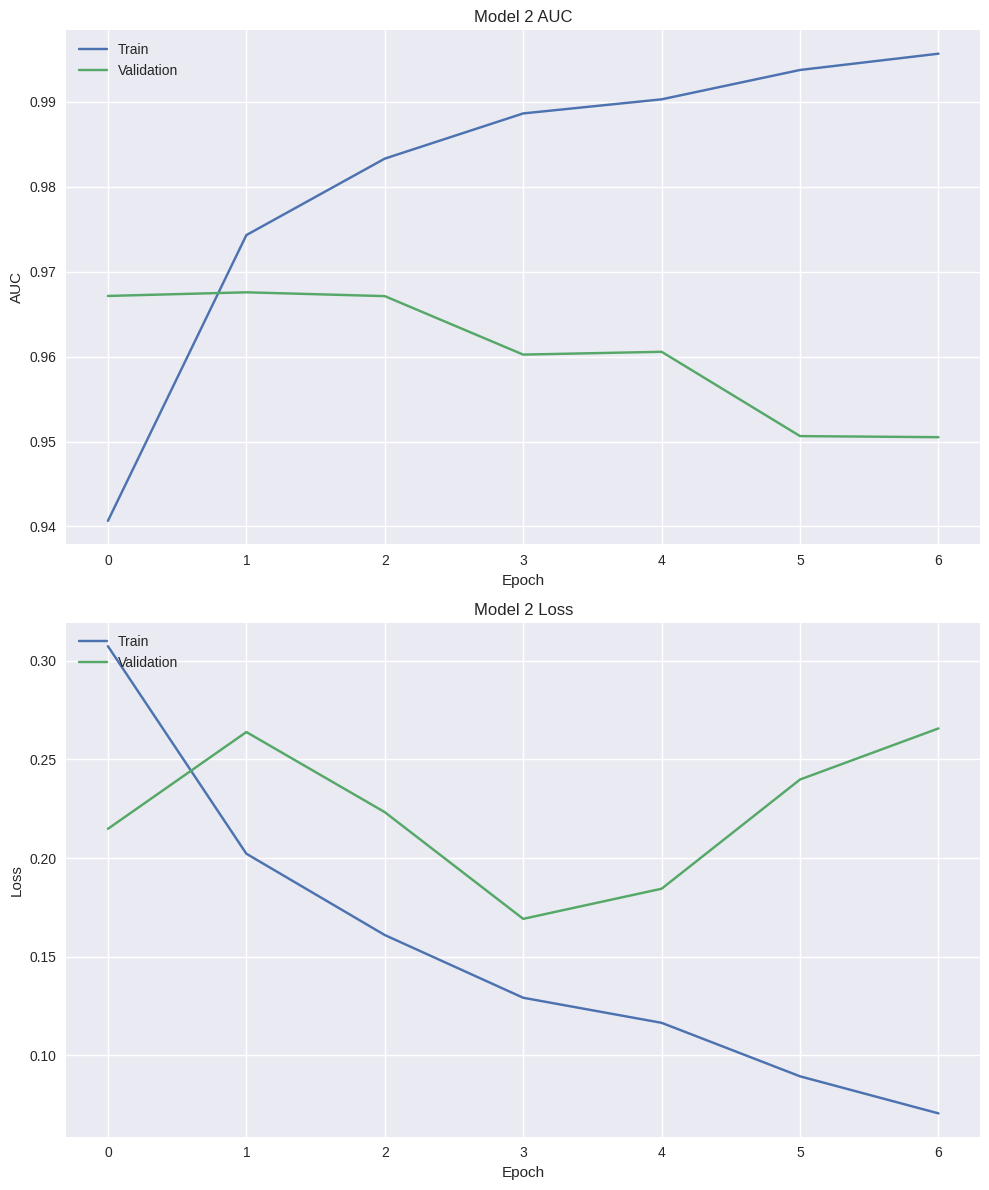

In [ ]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

# Plot AUC
ax1.plot(history2.history['auc'])
ax1.plot(history2.history['val_auc'])
ax1.set_title('Model 2 AUC')
ax1.set_ylabel('AUC')
ax1.set_xlabel('Epoch')
ax1.legend(['Train', 'Validation'], loc='upper left')

# Plot Loss
ax2.plot(history2.history['loss'])
ax2.plot(history2.history['val_loss'])
ax2.set_title('Model 2 Loss')
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epoch')
ax2.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

This graph shows the Area Under the Curve (AUC) performance of Model 2 over training epochs for both the training and validation datasets. Here's an analysis of the plot:

Training Performance (Blue Line):

The training AUC starts around 0.945 and rapidly improves.
It shows consistent improvement over epochs, reaching above 0.99 by the end.
This indicates the model is learning well on the training data.


Validation Performance (Orange Line):

The validation AUC starts high (about 0.97) but then decreases over time.
It peaks around epoch 1 and then consistently declines.
By epoch 6, it has dropped to about 0.945.


Overfitting:

The divergence between training and validation performance is a clear sign of overfitting.
The model is memorizing the training data but not generalizing well to new data.


Early Stopping:

The best validation performance is around epoch 1-2.
Early stopping would likely have halted training at this point to prevent overfitting.


Model Adjustments Needed:

To address overfitting, consider:

Increasing regularization ( more dropout, L2 regularization)
Reducing model complexity
Gathering more training data
Using data augmentation techniques




Training Duration:

The graph shows 6 epochs, which is relatively few. The early stopping mechanism likely kicked in due to declining validation performance.

Number of toxic instances in the sample: 985
157/157 [==============================] - 1s 7ms/step
Top features contributing to toxic predictions:
    Feature     Weight
0       you  38.362328
1         a  23.582042
2      your  20.082403
3      fuck  19.422735
4   fucking  18.480297
5   allcaps  17.018348
6    stupid  15.017536
7      shit  12.590522
8     idiot  12.339783
9       You   7.491774
10   ashore   7.305213
11    sucks   6.798322
12     FUCK   6.331176
13      YOU   6.242268
14     hell   6.212099
15      ass   5.924968
16     Fuck   5.821540
17     suck   5.764794
18     crap   5.059830
19      gay   4.991778


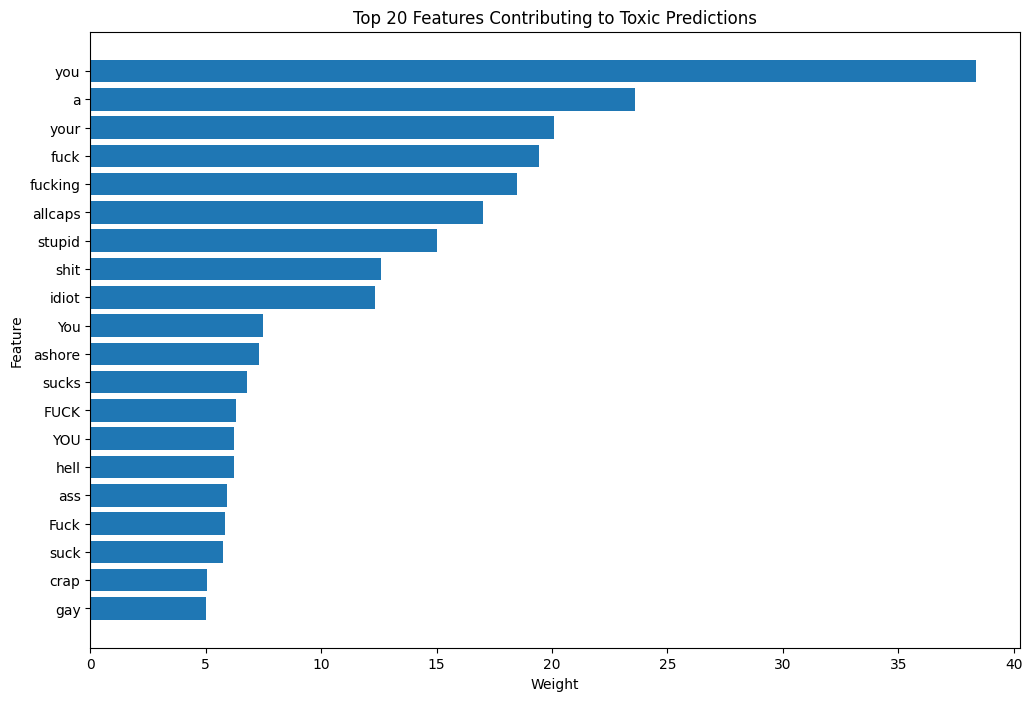

In [ ]:
#model interpetability

# Load the saved model
model_3 = load_model('/content/drive/MyDrive/model_2.h5')

# Define the batch size for testing
batch_size = 100

# Define a function to preprocess text and feature data
def preprocess_text_and_features(instance):
    instance_seq = tokenizer.texts_to_sequences([instance])
    instance_pad = pad_sequences(instance_seq, maxlen=max_len)

    # Use average additional features for LIME explanation
    avg_features = np.mean(additional_features_scaled, axis=0)
    avg_features = np.expand_dims(avg_features, axis=0)

    return [instance_pad, avg_features]

# Define a prediction function wrapper for LIME
def predict_with_preprocessing(texts):
    processed_inputs = [preprocess_text_and_features(text) for text in texts]
    text_inputs = np.array([inputs[0] for inputs in processed_inputs]).squeeze()
    feature_inputs = np.array([inputs[1] for inputs in processed_inputs]).squeeze()

    if text_inputs.shape[0] == 0:
        return np.zeros((len(texts), 2))

    predictions = model_3.predict([text_inputs, feature_inputs])
    return np.hstack((1 - predictions, predictions))

# Initialize LIME Text Explainer
explainer = LimeTextExplainer(class_names=['non-toxic', 'toxic'])

# Sample 10,000 instances from the entire dataset
sample_size = min(10000, len(df))
sample_indices = np.random.choice(df.index, sample_size, replace=False)
sample_texts = df['cleaned_text'].iloc[sample_indices].tolist()
sample_labels = df['oh_label'].iloc[sample_indices].tolist()  # Assuming 'oh_label' contains class labels

# Filter only toxic instances within the sampled data
toxic_texts = [sample_texts[i] for i in range(len(sample_texts)) if sample_labels[i] == 1]
toxic_labels = [sample_labels[i] for i in range(len(sample_labels)) if sample_labels[i] == 1]

# Print the count of toxic instances
print(f"Number of toxic instances in the sample: {len(toxic_texts)}")

# Function to process a batch of instances
def process_batch(batch_texts, batch_labels):
    batch_results = []
    for i, instance in enumerate(batch_texts):
        doc_size = len(instance.split())
        if doc_size < 2:  # Skip or handle short texts
            continue
        exp = explainer.explain_instance(instance, predict_with_preprocessing, num_features=10)
        label = batch_labels[i]
        feature_importance = Counter()
        if label == 1:  # Only process toxic instances
            for feature, weight in exp.as_list():
                feature_importance[feature] += weight
        batch_results.append(feature_importance)
    return batch_results

# Aggregate results for the batch
toxic_feature_importance = Counter()

# Process the batch of toxic instances
batch_results = process_batch(toxic_texts, toxic_labels)
for result in batch_results:
    for feature, weight in result.items():
        toxic_feature_importance[feature] += weight

# Convert to DataFrame for analysis
importance_df_toxic = pd.DataFrame(toxic_feature_importance.items(), columns=['Feature', 'Weight'])
importance_df_toxic = importance_df_toxic.sort_values(by='Weight', ascending=False).reset_index(drop=True)

# Display the top features contributing to toxic predictions
print("Top features contributing to toxic predictions:")
print(importance_df_toxic.head(20))

# Plot the feature importance for toxic class
plt.figure(figsize=(12, 8))
plt.barh(importance_df_toxic['Feature'].head(20), importance_df_toxic['Weight'].head(20))
plt.gca().invert_yaxis()
plt.title('Top 20 Features Contributing to Toxic Predictions')
plt.xlabel('Weight')
plt.ylabel('Feature')
plt.show()


# The Third Model using Model Tuning

In [ ]:
# the Third Model

embedding_dim = 50
text_input = Input(shape=(max_len,))

embedding = Embedding(max_words, embedding_dim, input_length=max_len)(text_input)
lstm1 = LSTM(32, return_sequences=True)(embedding)
lstm2 = LSTM(16)(lstm1)
batch_norm1 = BatchNormalization()(lstm2)

feature_input = Input(shape=(additional_features_scaled.shape[1],))
feature_dense = Dense(16, activation='relu', kernel_regularizer=l2(0.01))(feature_input)

concatenated = Concatenate()([batch_norm1, feature_dense])
dense1 = Dense(32, activation='relu', kernel_regularizer=l2(0.01))(concatenated)
dropout = Dropout(0.5)(dense1)
output = Dense(1, activation='sigmoid')(dropout)

model_3 = Model(inputs=[text_input, feature_input], outputs=output)
model_3.compile(optimizer=Adam(learning_rate=0.001),
                loss='binary_crossentropy',
                metrics=[AUC(name='auc')])

early_stopping = EarlyStopping(monitor='val_auc', patience=10, mode='max', verbose=1, restore_best_weights=True)
#Implement a learning rate scheduler
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.0001)


# Record start time
start_time = time.time()

# Train the model
history3 = model_3.fit(
    [X_text_train, X_feat_train], y_train,
    validation_split=0.2,
    epochs=50,  # Increased epochs, early stopping will prevent overfitting
    batch_size=32,
    callbacks=[early_stopping,reduce_lr],
    class_weight=class_weight_dict,
    verbose=1
)

# Record end time
end_time = time.time()

# Calculate runtime
runtime = end_time - start_time

# Print runtime
print(f"Total runtime: {timedelta(seconds=runtime)}")

#save the model
model_3.save('model_3.h5')

Epoch 1/50
3194/3194 [==============================] - 158s 47ms/step - loss: 0.3676 - auc: 0.9354 - val_loss: 0.4168 - val_auc: 0.9620 - lr: 0.0010
Epoch 2/50
3194/3194 [==============================] - 83s 26ms/step - loss: 0.2278 - auc: 0.9698 - val_loss: 0.1764 - val_auc: 0.9680 - lr: 0.0010
Epoch 3/50
3194/3194 [==============================] - 80s 25ms/step - loss: 0.1789 - auc: 0.9809 - val_loss: 0.2034 - val_auc: 0.9663 - lr: 0.0010
Epoch 4/50
3194/3194 [==============================] - 78s 24ms/step - loss: 0.1429 - auc: 0.9870 - val_loss: 0.1626 - val_auc: 0.9560 - lr: 0.0010
Epoch 5/50
3194/3194 [==============================] - 73s 23ms/step - loss: 0.1226 - auc: 0.9900 - val_loss: 0.2008 - val_auc: 0.9491 - lr: 0.0010
Epoch 6/50
3194/3194 [==============================] - 76s 24ms/step - loss: 0.1043 - auc: 0.9924 - val_loss: 0.3069 - val_auc: 0.9557 - lr: 0.0010
Epoch 7/50
3194/3194 [==============================] - 71s 22ms/step - loss: 0.0704 - auc: 0.9960 - val_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Evaluate the model
y_pred = model_3.predict([X_text_test, X_feat_test])
auc_score = roc_auc_score(y_test, y_pred)
print(f"Test AUC: {auc_score}")

999/999 [==============================] - 9s 8ms/step
Test AUC: 0.9683346074046889


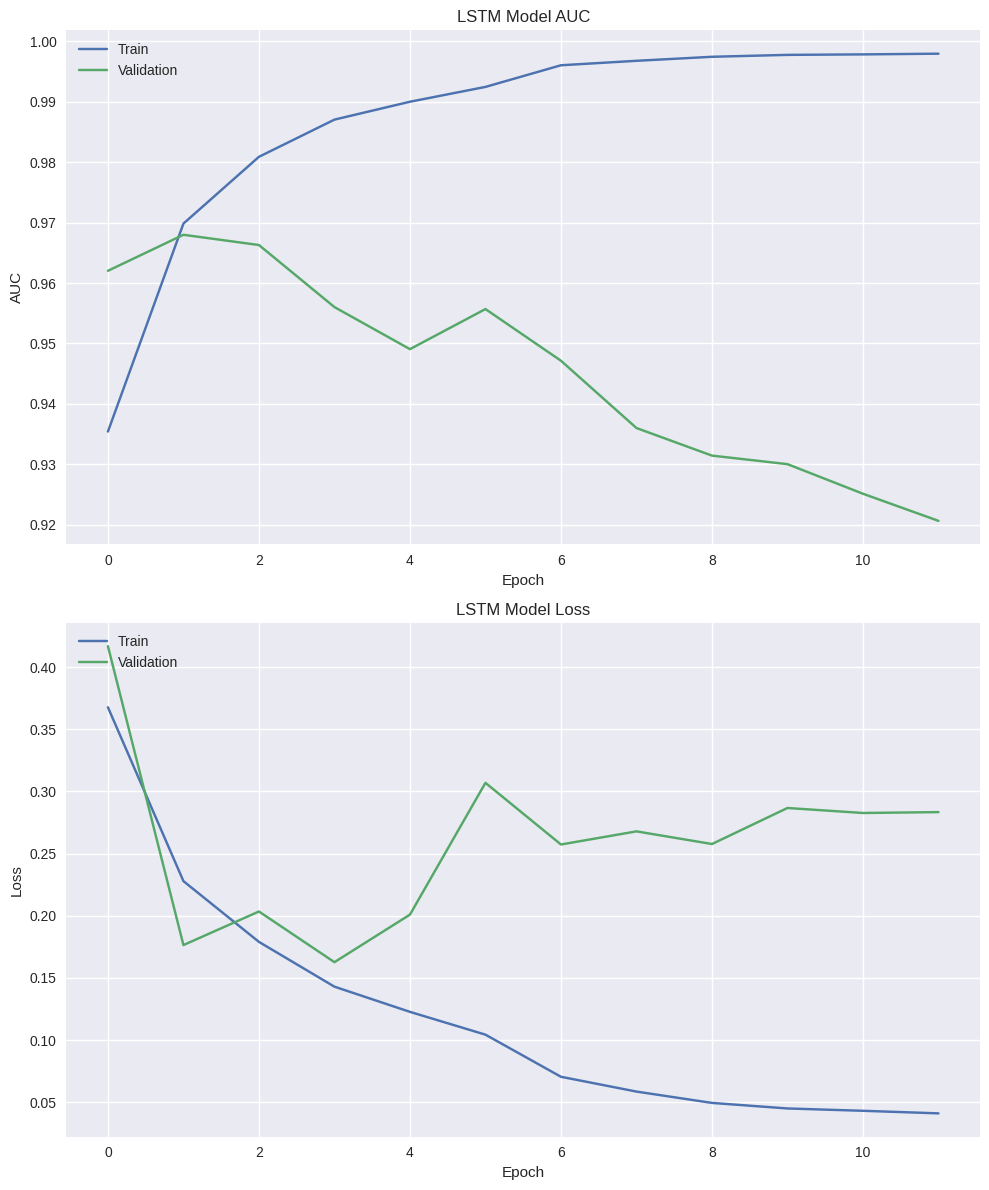

In [ ]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

# Plot AUC
ax1.plot(history3.history['auc'])
ax1.plot(history3.history['val_auc'])
ax1.set_title('LSTM Model AUC')
ax1.set_ylabel('AUC')
ax1.set_xlabel('Epoch')
ax1.legend(['Train', 'Validation'], loc='upper left')

# Plot Loss
ax2.plot(history3.history['loss'])
ax2.plot(history3.history['val_loss'])
ax2.set_title('LSTM Model Loss')
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epoch')
ax2.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

it works better in terms of "Loss" rather than the second model


it shows decrease in Loss over epochs , but still illustrate the overfitting for the model and needs more try to have a better and acceptable result

Number of toxic instances in the sample: 957
157/157 [==============================] - 1s 7ms/step
Top features contributing to toxic predictions:
     Feature     Weight
0        you  26.897986
1       fuck  25.505884
2    allcaps  20.563246
3    fucking  17.127624
4     stupid  14.238318
5       shit  13.782537
6      idiot  12.039615
7       your  11.581115
8       Fuck  10.823287
9          a  10.465488
10     bitch   8.389048
11       gay   7.183017
12      suck   7.117767
13    ashore   6.936739
14  bullshit   6.656746
15     sucks   6.618335
16      FUCK   6.482519
17      dick   6.453229
18    faggot   6.194049
19      cunt   5.009769


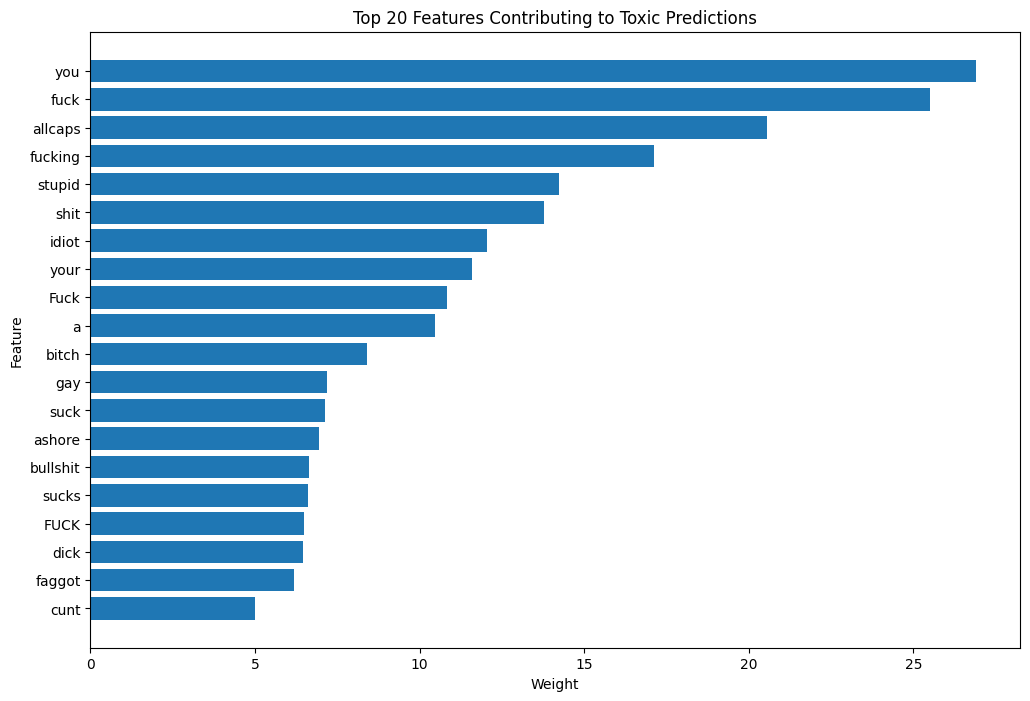

In [ ]:
import pandas as pd
import numpy as np
from collections import Counter
from lime.lime_text import LimeTextExplainer
from keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
from keras.models import load_model

# Load the saved model
model_3 = load_model('/content/drive/MyDrive/model_3.h5')

# Define the batch size for testing
batch_size = 100

# Define a function to preprocess text and feature data
def preprocess_text_and_features(instance):
    instance_seq = tokenizer.texts_to_sequences([instance])
    instance_pad = pad_sequences(instance_seq, maxlen=max_len)

    # Use average additional features for LIME explanation
    avg_features = np.mean(additional_features_scaled, axis=0)
    avg_features = np.expand_dims(avg_features, axis=0)

    return [instance_pad, avg_features]

# Define a prediction function wrapper for LIME
def predict_with_preprocessing(texts):
    processed_inputs = [preprocess_text_and_features(text) for text in texts]
    text_inputs = np.array([inputs[0] for inputs in processed_inputs]).squeeze()
    feature_inputs = np.array([inputs[1] for inputs in processed_inputs]).squeeze()

    if text_inputs.shape[0] == 0:
        return np.zeros((len(texts), 2))

    predictions = model_3.predict([text_inputs, feature_inputs])
    return np.hstack((1 - predictions, predictions))

# Initialize LIME Text Explainer
explainer = LimeTextExplainer(class_names=['non-toxic', 'toxic'])

# Sample 10,000 instances from the entire dataset
sample_size = min(10000, len(df))
sample_indices = np.random.choice(df.index, sample_size, replace=False)
sample_texts = df['cleaned_text'].iloc[sample_indices].tolist()
sample_labels = df['oh_label'].iloc[sample_indices].tolist()  # Assuming 'oh_label' contains class labels

# Filter only toxic instances within the sampled data
toxic_texts = [sample_texts[i] for i in range(len(sample_texts)) if sample_labels[i] == 1]
toxic_labels = [sample_labels[i] for i in range(len(sample_labels)) if sample_labels[i] == 1]

# Print the count of toxic instances
print(f"Number of toxic instances in the sample: {len(toxic_texts)}")

# Function to process a batch of instances
def process_batch(batch_texts, batch_labels):
    batch_results = []
    for i, instance in enumerate(batch_texts):
        doc_size = len(instance.split())
        if doc_size < 2:  # Skip or handle short texts
            continue
        exp = explainer.explain_instance(instance, predict_with_preprocessing, num_features=10)
        label = batch_labels[i]
        feature_importance = Counter()
        if label == 1:  # Only process toxic instances
            for feature, weight in exp.as_list():
                feature_importance[feature] += weight
        batch_results.append(feature_importance)
    return batch_results

# Aggregate results for the batch
toxic_feature_importance = Counter()

# Process the batch of toxic instances
batch_results = process_batch(toxic_texts, toxic_labels)
for result in batch_results:
    for feature, weight in result.items():
        toxic_feature_importance[feature] += weight

# Convert to DataFrame for analysis
importance_df_toxic = pd.DataFrame(toxic_feature_importance.items(), columns=['Feature', 'Weight'])
importance_df_toxic = importance_df_toxic.sort_values(by='Weight', ascending=False).reset_index(drop=True)

# Display the top features contributing to toxic predictions
print("Top features contributing to toxic predictions:")
print(importance_df_toxic.head(20))

# Plot the feature importance for toxic class
plt.figure(figsize=(12, 8))
plt.barh(importance_df_toxic['Feature'].head(20), importance_df_toxic['Weight'].head(20))
plt.gca().invert_yaxis()
plt.title('Top 20 Features Contributing to Toxic Predictions')
plt.xlabel('Weight')
plt.ylabel('Feature')
plt.show()



# The 4th Model -  Bidirectional GRU

In [ ]:
# Calculate class weights
unique_classes = np.unique(y_train)
class_weights = compute_class_weight(class_weight='balanced', classes=unique_classes, y=y_train)
class_weight_dict = dict(zip(unique_classes, class_weights))

print("Class weights:", class_weight_dict)

# Define the model
embedding_dim = 50

text_input = Input(shape=(max_len,))
embedding = Embedding(max_words, embedding_dim, input_length=max_len)(text_input)
lstm1 = Bidirectional(GRU(16, return_sequences=True))(embedding)
lstm2 = Bidirectional(GRU(8))(lstm1)
batch_norm1 = BatchNormalization()(lstm2)
dropout1 = Dropout(0.6)(batch_norm1)

feature_input = Input(shape=(additional_features_scaled.shape[1],))
feature_dense = Dense(16, activation='relu', kernel_regularizer=l2(0.02))(feature_input)

concatenated = Concatenate()([dropout1, feature_dense])
dense1 = Dense(16, activation='relu', kernel_regularizer=l2(0.02))(concatenated)
dropout2 = Dropout(0.6)(dense1)
output = Dense(1, activation='sigmoid')(dropout2)

model_4 = Model(inputs=[text_input, feature_input], outputs=output)

optimizer = Adam(learning_rate=0.0005, clipnorm=1.0)
model_4.compile(optimizer=optimizer,
                loss='binary_crossentropy',
                metrics=[AUC(name='auc')])

# Callbacks
early_stopping = EarlyStopping(monitor='val_auc', patience=10, mode='max', verbose=1, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.00001)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_auc', mode='max', save_best_only=True, verbose=1)

# Record start time
start_time = time.time()

# Train the model
history4 = model_4.fit(
    [X_text_train, X_feat_train], y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping, reduce_lr, model_checkpoint],
    class_weight=class_weight_dict,
    verbose=1
)

# Record end time
end_time = time.time()

# Calculate runtime
runtime = end_time - start_time

# Print runtime
print(f"Total runtime: {timedelta(seconds=runtime)}")

#save the model
model_4.save('model_4.h5')

Class weights: {0: 0.5532228169550832, 1: 5.197233523189585}
Epoch 1/50
3193/3194 [============================>.] - ETA: 0s - loss: 0.5548 - auc: 0.8749
Epoch 1: val_auc improved from -inf to 0.95772, saving model to best_model.h5
3194/3194 [==============================] - 178s 53ms/step - loss: 0.5548 - auc: 0.8749 - val_loss: 0.2222 - val_auc: 0.9577 - lr: 5.0000e-04
Epoch 2/50
   1/3194 [..............................] - ETA: 2:23 - loss: 0.3108 - auc: 0.9667

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3193/3194 [============================>.] - ETA: 0s - loss: 0.3320 - auc: 0.9416
Epoch 2: val_auc improved from 0.95772 to 0.95976, saving model to best_model.h5
3194/3194 [==============================] - 127s 40ms/step - loss: 0.3320 - auc: 0.9416 - val_loss: 0.1674 - val_auc: 0.9598 - lr: 5.0000e-04
Epoch 3/50
3194/3194 [==============================] - ETA: 0s - loss: 0.2991 - auc: 0.9523
Epoch 3: val_auc did not improve from 0.95976
3194/3194 [==============================] - 124s 39ms/step - loss: 0.2991 - auc: 0.9523 - val_loss: 0.2368 - val_auc: 0.9579 - lr: 5.0000e-04
Epoch 4/50
3194/3194 [==============================] - ETA: 0s - loss: 0.2854 - auc: 0.9561
Epoch 4: val_auc did not improve from 0.95976
3194/3194 [==============================] - 125s 39ms/step - loss: 0.2854 - auc: 0.9561 - val_loss: 0.1927 - val_auc: 0.9375 - lr: 5.0000e-04
Epoch 5/50
3194/3194 [==============================] - ETA: 0s - loss: 0.2756 - auc: 0.9590
Epoch 5: val_auc did not improve from

In [ ]:
# Evaluate the model
y_pred = model_4.predict([X_text_test, X_feat_test])
auc_score = roc_auc_score(y_test, y_pred)
print(f"Test AUC: {auc_score}")

999/999 [==============================] - 13s 12ms/step
Test AUC: 0.9610901449802537


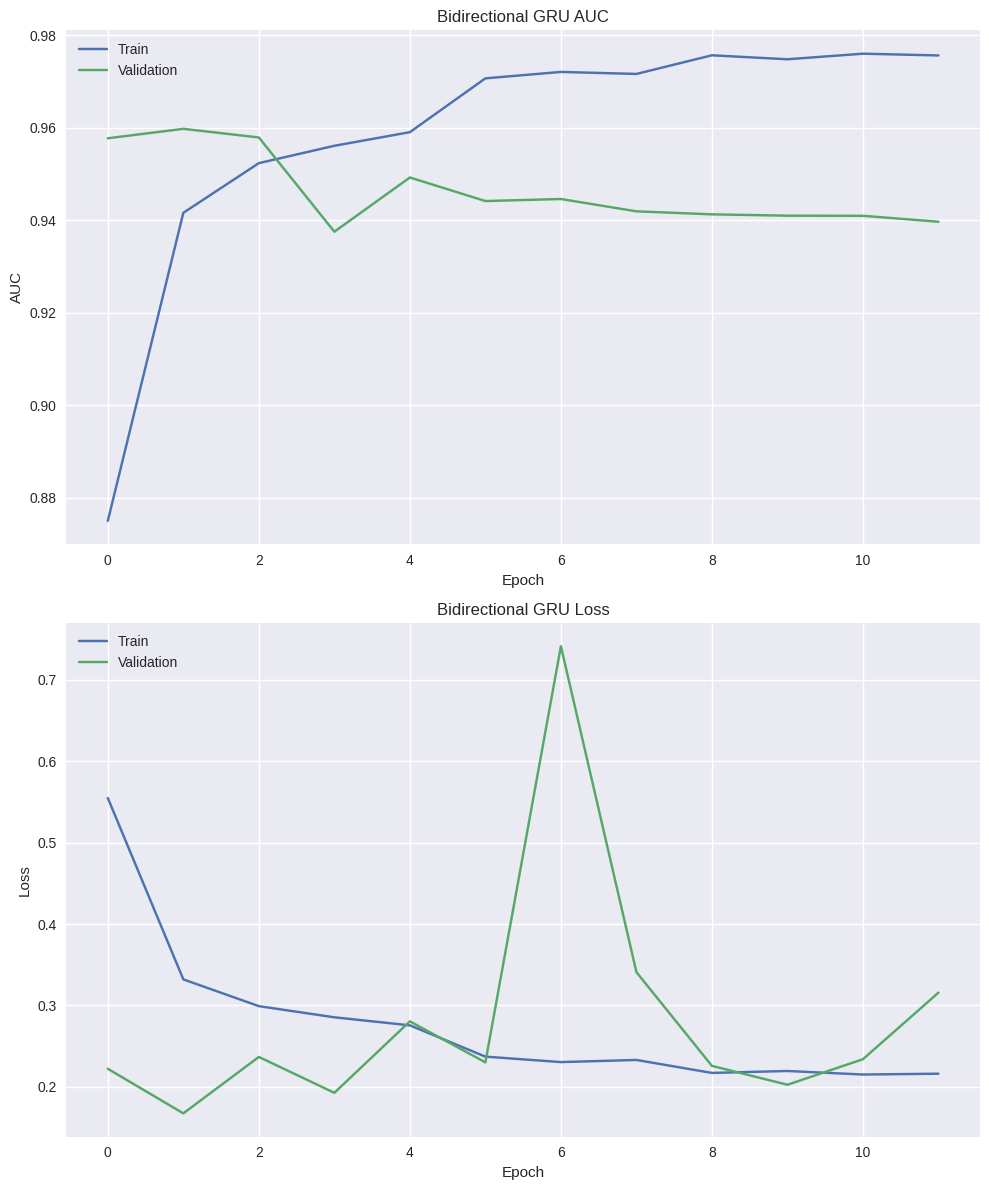

In [ ]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

# Plot AUC
ax1.plot(history4.history['auc'])
ax1.plot(history4.history['val_auc'])
ax1.set_title('Bidirectional GRU AUC')
ax1.set_ylabel('AUC')
ax1.set_xlabel('Epoch')
ax1.legend(['Train', 'Validation'], loc='upper left')

# Plot Loss
ax2.plot(history4.history['loss'])
ax2.plot(history4.history['val_loss'])
ax2.set_title('Bidirectional GRU Loss')
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epoch')
ax2.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

Number of toxic instances in the sample: 987
157/157 [==============================] - 2s 11ms/step
Top features contributing to toxic predictions:
     Feature     Weight
0        you  31.041922
1       fuck  28.079884
2       Fuck  21.274108
3     stupid  18.081395
4    fucking  17.636419
5        ass  15.776345
6       shit  14.243115
7      idiot  13.671186
8     ashore  13.172940
9       dick  11.481662
10      FUCK  11.059110
11      hell  10.160499
12      crap   9.182846
13       gay   8.516801
14    faggot   7.691258
15  bullshit   7.377093
16      suck   7.339484
17      your   7.145749
18     bitch   6.176593
19     sucks   5.848714


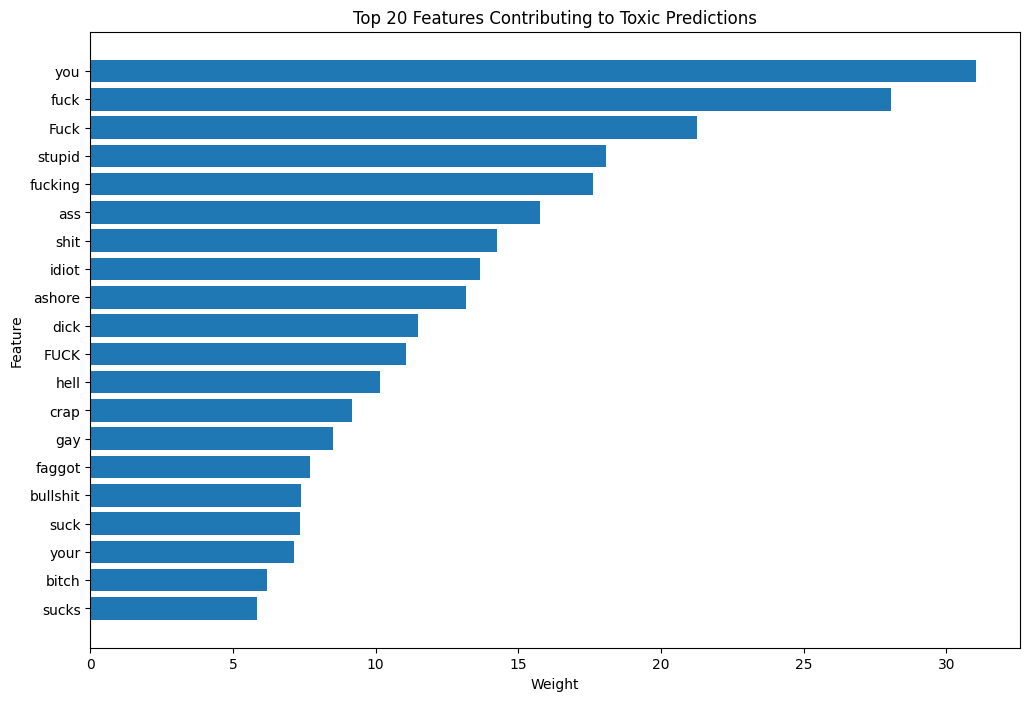

In [ ]:
import pandas as pd
import numpy as np
from collections import Counter
from lime.lime_text import LimeTextExplainer
from keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
from keras.models import load_model

# Load the saved model
model_3 = load_model('/content/drive/MyDrive/model_4.h5')

# Define the batch size for testing
batch_size = 100

# Define a function to preprocess text and feature data
def preprocess_text_and_features(instance):
    instance_seq = tokenizer.texts_to_sequences([instance])
    instance_pad = pad_sequences(instance_seq, maxlen=max_len)

    # Use average additional features for LIME explanation
    avg_features = np.mean(additional_features_scaled, axis=0)
    avg_features = np.expand_dims(avg_features, axis=0)

    return [instance_pad, avg_features]

# Define a prediction function wrapper for LIME
def predict_with_preprocessing(texts):
    processed_inputs = [preprocess_text_and_features(text) for text in texts]
    text_inputs = np.array([inputs[0] for inputs in processed_inputs]).squeeze()
    feature_inputs = np.array([inputs[1] for inputs in processed_inputs]).squeeze()

    if text_inputs.shape[0] == 0:
        return np.zeros((len(texts), 2))

    predictions = model_3.predict([text_inputs, feature_inputs])
    return np.hstack((1 - predictions, predictions))

# Initialize LIME Text Explainer
explainer = LimeTextExplainer(class_names=['non-toxic', 'toxic'])

# Sample 10,000 instances from the entire dataset
sample_size = min(10000, len(df))
sample_indices = np.random.choice(df.index, sample_size, replace=False)
sample_texts = df['cleaned_text'].iloc[sample_indices].tolist()
sample_labels = df['oh_label'].iloc[sample_indices].tolist()  # Assuming 'oh_label' contains class labels

# Filter only toxic instances within the sampled data
toxic_texts = [sample_texts[i] for i in range(len(sample_texts)) if sample_labels[i] == 1]
toxic_labels = [sample_labels[i] for i in range(len(sample_labels)) if sample_labels[i] == 1]

# Print the count of toxic instances
print(f"Number of toxic instances in the sample: {len(toxic_texts)}")

# Function to process a batch of instances
def process_batch(batch_texts, batch_labels):
    batch_results = []
    for i, instance in enumerate(batch_texts):
        doc_size = len(instance.split())
        if doc_size < 2:  # Skip or handle short texts
            continue
        exp = explainer.explain_instance(instance, predict_with_preprocessing, num_features=10)
        label = batch_labels[i]
        feature_importance = Counter()
        if label == 1:  # Only process toxic instances
            for feature, weight in exp.as_list():
                feature_importance[feature] += weight
        batch_results.append(feature_importance)
    return batch_results

# Aggregate results for the batch
toxic_feature_importance = Counter()

# Process the batch of toxic instances
batch_results = process_batch(toxic_texts, toxic_labels)
for result in batch_results:
    for feature, weight in result.items():
        toxic_feature_importance[feature] += weight

# Convert to DataFrame for analysis
importance_df_toxic = pd.DataFrame(toxic_feature_importance.items(), columns=['Feature', 'Weight'])
importance_df_toxic = importance_df_toxic.sort_values(by='Weight', ascending=False).reset_index(drop=True)

# Display the top features contributing to toxic predictions
print("Top features contributing to toxic predictions:")
print(importance_df_toxic.head(20))

# Plot the feature importance for toxic class
plt.figure(figsize=(12, 8))
plt.barh(importance_df_toxic['Feature'].head(20), importance_df_toxic['Weight'].head(20))
plt.gca().invert_yaxis()
plt.title('Top 20 Features Contributing to Toxic Predictions')
plt.xlabel('Weight')
plt.ylabel('Feature')
plt.show()
